<a href="https://colab.research.google.com/github/951237/TIL/blob/master/200819_TIL_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EC%95%84%EC%9D%B4%EB%A6%AC%EC%8A%A4_%ED%92%88%EC%A2%85%EB%B6%84%EB%A5%98_%EA%B0%9C%EC%84%A0%ED%8C%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코딩야학 - 텐서플로 아이리스 품종 분류

## 0. 라이브러리 호출 및 변수 선언선언

In [3]:
import tensorflow as tf
import pandas as pd

URL = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'

## 1. 과거의 데이터 준비준비

In [4]:
iris = pd.read_csv(URL)

In [5]:
iris = pd.get_dummies(iris) # 원핫 인코딩 - 분류값을 수치화 시켜줌.

In [6]:
iris.columns

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')

In [7]:
i_val = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']] # 독립변수 / 독립변수 만들때 데이터프레임 붙여주기
d_val = iris[['품종_setosa', '품종_versicolor', '품종_virginica']] # 종속변수 / 종속변수 만들때 데이터 프레임 붙여주기

## 2. 모델의 구조 만들기

In [25]:
X = tf.keras.layers.Input(shape=[4]) #독립변수가 4개

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics = 'accuracy')

## 3. 데이터로 모델 학습(FIT)

In [34]:
history = model.fit(i_val, d_val, epochs=100, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2505 - accuracy: 0.9464 - val_loss: 0.1623 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2765 - accuracy: 0.9107 - val_loss: 0.1483 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2162 - accuracy: 0.9464 - val_loss: 0.1310 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.9464 - val_loss: 0.1233 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.9375 - val_loss: 0.1146 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.9643 - val_loss: 0.1037 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2144 - accuracy: 0.9464 - val_loss: 0.1026 - val_accuracy: 1.0000
Epoch 8/100
4/4 [=========

## 그래프로 시각화 하기

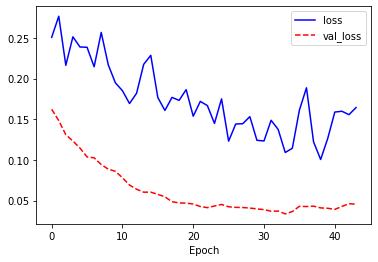

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 4. 모델이용하기

In [36]:
print("예측하기 : ", model.predict(i_val[0:5])) # 예측 데이터는 독립변수에서 가져다 쓰기

예측하기 :  [[0.99347395 0.00435137 0.00217459]
 [0.99107176 0.0057351  0.00319305]
 [0.994568   0.0036568  0.00177526]
 [0.9916157  0.00542129 0.00296288]
 [0.9939865  0.00397116 0.00204231]]
